## Importing Libraries

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import IPython
import sklearn
import random
import time

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [19]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

## Import Data

In [3]:
data = pd.read_csv('train.csv')
print(data.info())
data_val = pd.read_csv('test.csv')
data_all = [data, data_val]
data.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
530,531,1,2,"Quick, Miss. Phyllis May",female,2.0,1,1,26360,26.0000,NaN,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,NaN,0,0,65306,8.1125,NaN,S
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,2651,11.2417,NaN,C
769,770,0,3,"Gronnestad, Mr. Daniel Danielsen",male,32.0,0,0,8471,8.3625,NaN,S
209,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.0000,A31,C
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,SOTON/O.Q. 3101305,7.0500,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S


In [4]:
print(data.isnull().sum())
print(data_val.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Kantor, Mrs. Sinai (Miriam Sternin)",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Data Cleaning

### Missing Values

In [6]:
for dataset in data_all:    
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
data_val.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

### Dropping Features

In [7]:
data.drop(['Cabin', 'PassengerId', 'Ticket'], axis = 1, inplace = True)
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## Feature Engineering

In [8]:
# making family size

for dataset in data_all:
    
    dataset['Family'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['Alone'] = 1
    dataset['Alone'].loc[dataset['Family'] > 1] = 0

    # extracting title
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

    # creating bins
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
   
    
min_title = 10
title_names = (data['Title'].value_counts() < min_title)
data['Title'] = data['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data['Title'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64


### Encoding

In [9]:
label = LabelEncoder()
for dataset in data_all:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [10]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Alone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,4,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,4,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,3,2,1


In [11]:
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare', 'Family', 'Alone']
target = ['Survived']
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'SibSp', 'Parch', 'AgeBin_Code', 'FareBin_Code', 'Family', 'Alone']

In [12]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(data[data1_x_calc], data[target], random_state = 0)
train_x1, test_x1, train_y1, test_y1 = model_selection.train_test_split(data[data1_x_bin], data[target], random_state = 0)

In [13]:
for x in data1_x_calc:
    if data[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(data[[x, target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')

Survival Correlation by: Sex_Code
   Sex_Code  Survived
0         0  0.742038
1         1  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked_Code
   Embarked_Code  Survived
0              0  0.553571
1              1  0.389610
2              2  0.339009
---------- 

Survival Correlation by: Title_Code
   Title_Code  Survived
0           0  0.575000
1           1  0.444444
2           2  0.697802
3           3  0.156673
4           4  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlat

## Data Analysis

Text(0, 0.5, '# of Passengers')

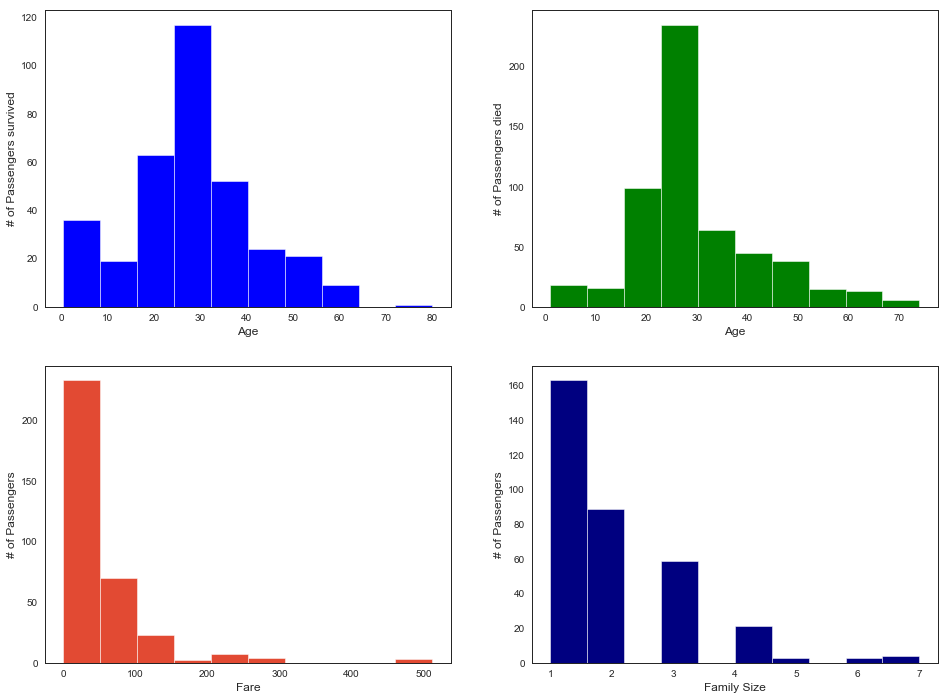

In [14]:
plt.figure(figsize=([16, 12]))

plt.subplot(221)
plt.hist(data[data['Survived']==1]['Age'], color='blue')
plt.xlabel('Age')
plt.ylabel('# of Passengers survived')

plt.subplot(222)
plt.hist(data[data['Survived']==0]['Age'], color='green')
plt.xlabel('Age')
plt.ylabel('# of Passengers died')

plt.subplot(223)
plt.hist(data[data['Survived'] == 1]['Fare'])
plt.xlabel('Fare')
plt.ylabel('# of Passengers')

plt.subplot(224)
plt.hist(data[data['Survived'] == 1]['Family'], color='navy')
plt.xlabel('Family Size')
plt.ylabel('# of Passengers')

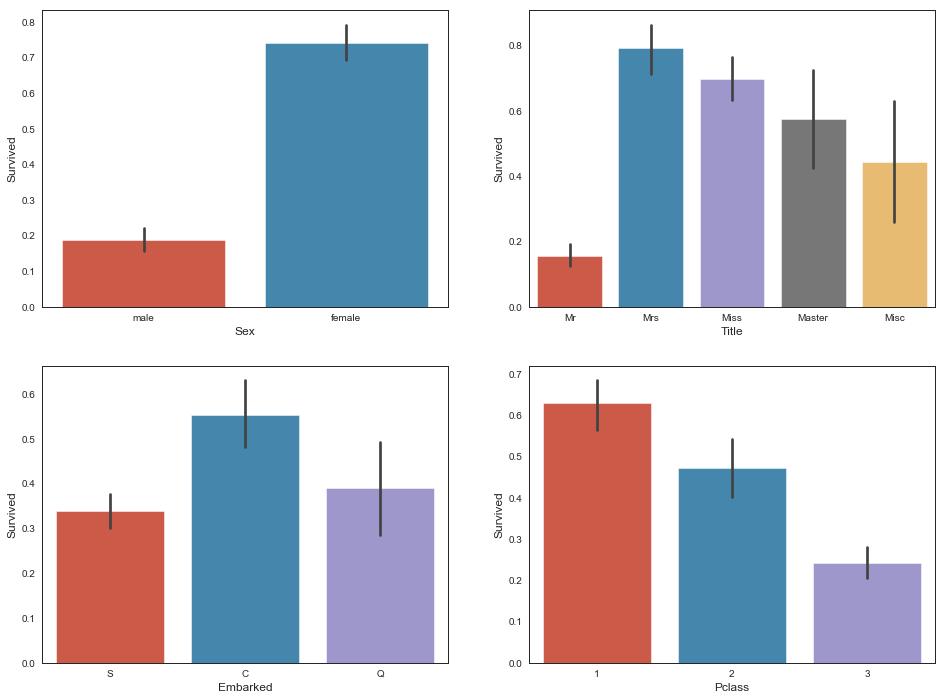

In [15]:
fig, saxis = plt.subplots(2, 2, figsize = (16, 12))
sns.barplot(x = 'Sex', y = 'Survived', data = data, ax = saxis[0,0])
sns.barplot(x = 'Title', y = 'Survived', data = data, ax = saxis[0,1])
sns.barplot(x = 'Embarked', y = 'Survived', data = data, ax = saxis[1,0])
sns.barplot(x = 'Pclass', y = 'Survived', data = data, ax = saxis[1,1])

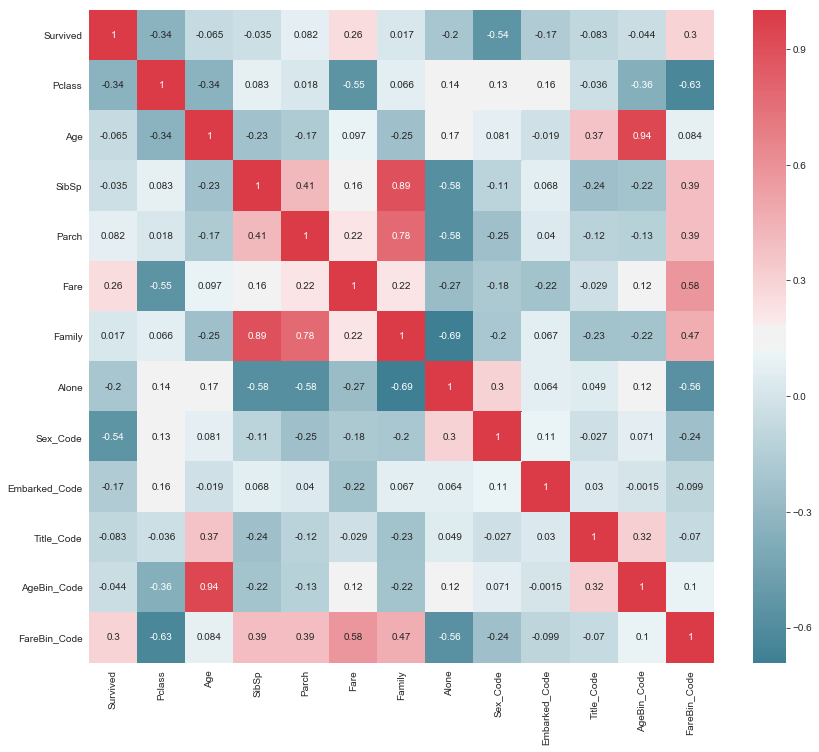

In [16]:
fig, ax = plt.subplots(figsize = (14, 12))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(data.corr(), cmap = colormap, ax = ax, annot = True)

## Model Data

In [20]:
models = [
    ensemble.AdaBoostClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(),
    svm.SVC(probability=True),
    svm.LinearSVC(),
    tree.DecisionTreeClassifier(),
    XGBClassifier() 
]

columns = ['Name', 'Accuracy']
evaluate = pd.DataFrame(columns = columns)

index = 0

for model in models:
    
    name = model.__class__.__name__
    evaluate.loc[index, 'Name'] = name
    
    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    acc = accuracy_score(pred_y, test_y)
    
    evaluate.loc[index, 'Accuracy'] = acc

    index+=1

/home/nitish/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nitish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/nitish/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nitish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using

In [22]:
evaluate.sort_values(by = ['Accuracy'], ascending = False, inplace = True)
evaluate

,Name,Accuracy
14,XGBClassifier,0.860987
2,GradientBoostingClassifier,0.856502
1,ExtraTreesClassifier,0.829596
0,AdaBoostClassifier,0.825112
3,RandomForestClassifier,0.807175
5,RidgeClassifierCV,0.793722
4,LogisticRegressionCV,0.789238
9,GaussianNB,0.789238
8,BernoulliNB,0.780269
12,LinearSVC,0.775785
